<a href="https://colab.research.google.com/github/RAFASOLIS/ml/blob/main/Proyecto_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

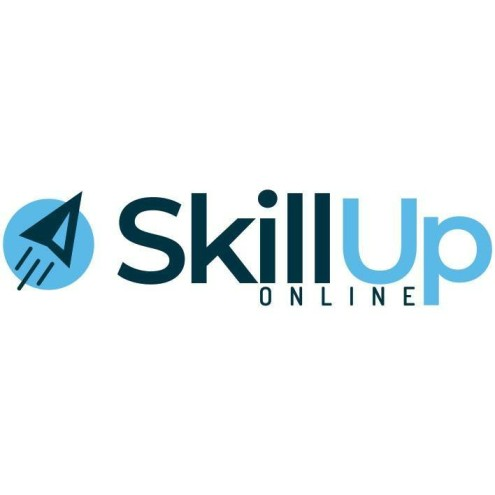

# **Detección de fraudes con tarjetas de crédito**

Enlace al dataset: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

### Importa las bibliotecas necesarias

In [101]:
# Importa la bibliotecas necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings("ignore")

**Descripción del contenido del dataset creditcard.csv**

El conjunto de datos sometido a estudio contiene transacciones realizadas con tarjetas de credito en septiembre de 2013 por titulares de tarjetas europeos.

- Contiene solo variables de entrada numericas que son el resultado de una transformacion PCA (https://rpubs.com/Cristina_Gil/PCA).
- Por motivos de confidencialidad no se ha podido exponer las caracteristicas y datos originales, siendo variables de esta transformacion desde V1 hasta la V31.
- Las unicas caracteristicas que no se han transformado son tiempo (time) y cantidad o importe de la transaccion (amount).
- La caracteristica tiempo contiene los segundos transcurridos entre cada transaccion y la primera transaccion en el conjunto de datos.
- La caracteristica ‘Clase’ es la variable de respuesta y toma el valor 1 en caso de fraude y 0 en caso contrario.

Fuente: https://rpubs.com/Jacalti/CreditCard_Predict


### Importa y organiza el dataset

In [102]:
df=pd.read_csv("/content/sample_data/creditcard.csv")
df.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [103]:
# Listado de columnas del dataset
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [104]:
# Tenemos 30 columnas numéricas. No existen valores nulos.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [105]:
#Analizamos los principales valores estadisticos de las variables del dataset.
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [106]:
#La columna Class posee 2 posibles valores. 1-->Fraund 0-->Non Fraud
df['Class'].unique()

array([0, 1])

In [108]:
#Existen 284.315 registros clasificados sin fraude y 492 con fraude
numero_transacciones_por_tipo=df[['Class','Amount']].groupby('Class').count()
print("numero_transacciones_por_tipo:{}".format(numero_transacciones_por_tipo))

numero_transacciones_por_tipo:       Amount
Class        
0      284315
1         492


<Axes: xlabel='Class', ylabel='count'>

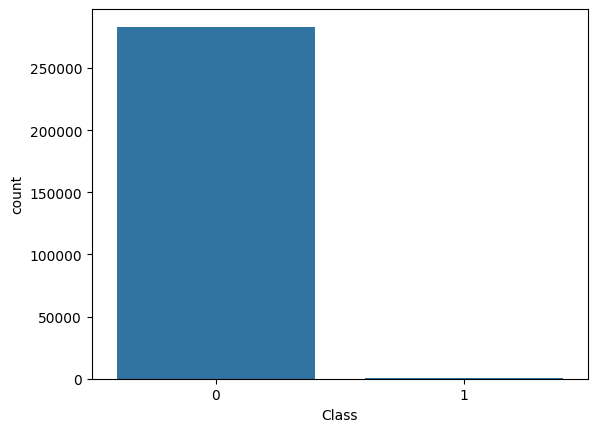

In [ ]:
#Gráficamente el resultado anterior sería el siguiente
sns.countplot(x='Class',data=df, legend='auto')


<details><summary><b>Haz clic aquí para obtener una pista</b></summary>



```
Comienza por importar la biblioteca de pandas: import pandas as pd.
    
Utiliza la función read_csv() para cargar el archivo CSV en un dataframe de pandas. Especifica la ruta en los paréntesis, por ejemplo: pd.read_csv("ruta_al_archivo.csv").
    
Asigna al dataframe resultante al nombre de una variable, por ejemplo: data = pd.read_csv("ruta_al_archivo.csv").
    
Utiliza el método head() sobre el dataframe para mostrar las primeras 10 filas, por ejemplo: data.head(10).
    
Asegúrate de reemplazar "ruta_al_archivo.csv" con la ruta real a tu archivo y el nombre de tu archivo CSV..

```



</details>

### Limpia los datos

a. Valores perdidos

In [109]:
#Nº de valores nulos
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

<details><summary><b>Haz clic aquí para obtener una pista</b></summary>



```

Utiliza el nombre de la variable del dataframe seguido del método isnull() para crear un dataframe booleano donde «verdadero» indique un valor nulo y «falso» indique un valor no nulo.

Utiliza el método sum() en el dataframe booleano para contar la cantidad de valores verdaderos (i.e., la cantidad de valores nulos) en cada columna.

Si unes ambos pasos, el código se verá así: data.isnull().sum()


Este código asume que el nombre del datafrme de pandas es «data». Si tu dataframe tiene un nombre diferente, reemplaza «data» con el nombre correcto de la variable.

```



</details>

b. Datos duplicados

In [110]:
#Número valores duplicados
df.duplicated().sum()

1081

In [97]:
df.dropna(axis=1,inplace=True)

In [111]:
#Borramos duplicados
total_con_duplicados=df['Class'].count()
df.drop_duplicates(inplace=True)
print(f"total_con_duplicados:{total_con_duplicados}")
total_sin_duplicados=df['Class'].count()
print(f"total_sin_duplicados:{total_sin_duplicados}")
print(f"filas borradas: {total_con_duplicados-total_sin_duplicados}")


total_con_duplicados:284807
total_sin_duplicados:283726
filas borradas: 1081


<details><summary><b>Haz clic aquí para obtener una pista</b></summary>



```
Usa el nombre de la variable del dataframe seguido del método duplicated() para crear un dataframe booleano donde «verdadero» indicará una fila duplicada y «falso» una fila no duplicada.

Usa el método sum() en el dataframe booleano para contar la cantidad de valores verdaderos (i.e., la cantidad de filas duplicadas).

Si unes ambos pasos, el código se verá así: data.duplicated().sum()

Este código asume que el nombre del dataframe de pandas es «data». Si tu dataframe tiene un nombre diferente, reemplaza «data» con el nombre correcto de la variable.

```



</details>

### Analiza los datos

Pregunta 1: ¿Cuál es el porcentaje de transacciones fraudulentas en el dataset?



In [112]:
# Calcula el porcentaje de transacciones fraudulentas
porcentaje_transacciones_fraudulentas= (df[['Class','Amount']].groupby('Class').count()/df['Class'].count())*100
print("porcentaje_transacciones_fraudulentas:{}".format(porcentaje_transacciones_fraudulentas))

porcentaje_transacciones_fraudulentas:         Amount
Class          
0      99.83329
1       0.16671


<details>
  <summary><b>Haz clic aquí para obtener una pista</b></summary>

    Para calcular el porcentaje de transacciones fraudulentas, debes contar la cantidad de transacciones fraudulentas (aquellas donde «Class» es igual a 1) y dividirla por le número total de transacciones en el dataset. Después, multiplica el resultado por 100 para obtener el porcentaje.
</details>

Pregunta 2: ¿Cuál es el importe medio de las transacciones fraudulentas?



In [113]:
# Calcula el importe medio de las transacciones fraudulentas
importe_medio_por_tipo_transaccion=df[['Class','Amount']].groupby('Class').mean('Amount')
print("importe_medio_por_tipo_transaccion:{}".format(importe_medio_por_tipo_transaccion))

importe_medio_por_tipo_transaccion:           Amount
Class            
0       88.413575
1      123.871860


In [ ]:
# Muestra el importe medio de las transacciones fraudulentas

<Axes: xlabel='Class'>

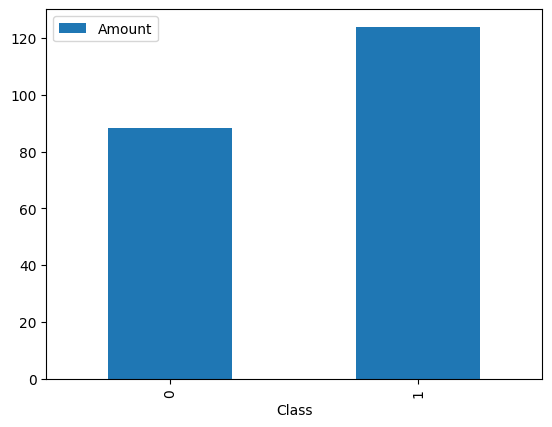

In [114]:
#Gráficamente el resultado anterior sería el siguiente
importe_medio_por_tipo_transaccion.plot.bar()

<details>
  <summary><b>Haz clic aquí para obtener una pista</b></summary>

    Para calcular el importe medio de las tansacciones fraudulentas, primero deberás filtrar el dataset para que contenga solamente las transacciones fraudulentas (aquellas donde «Class» es igual a 1) y, después, calcular la media de la columna «Amount» de los datos filtrados.
</details>

### Visualiza los datos


Pregunta 1: ¿Cuántas transacciones fraudulentas hay en comparación con las no fraudulentas? (Utiliza un gráfico de barras)

<Axes: xlabel='Class'>

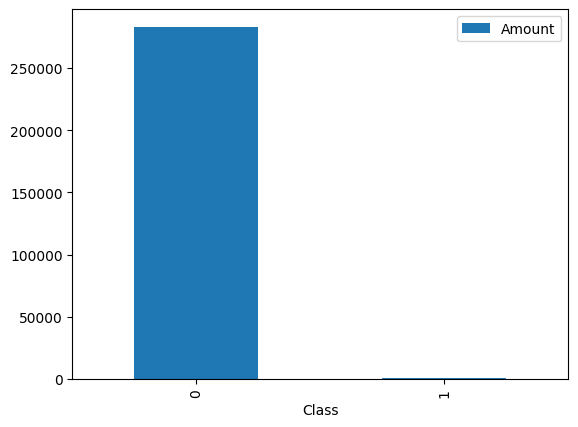

In [115]:
# Cuenta el número de transacciones fraudulentas y no fraudulentes

# Muestra la distribución de las traducciones fraudulentas con respecto de las no fraudulentas
df[['Class','Amount']].groupby('Class').count().plot.bar()

<details>
  <summary><b>Haz clic aquí para obtener una pista</b></summary>

    Para crear un gráfico de barras que muestre la cantidad de transacciones fraudulentas y no fraudulentas, deberás contar las veces que ocurre cada clase (fraude y no fraude) según la información de la columna «Class» y después representar estos recuentos en un gráfico de barras.
</details>

Pregunta 2: ¿Cuál es la distribución de los importes de las transacciones fraudulentas? (Utiliza un histograma)


Text(0, 0.5, 'Frecuencia')

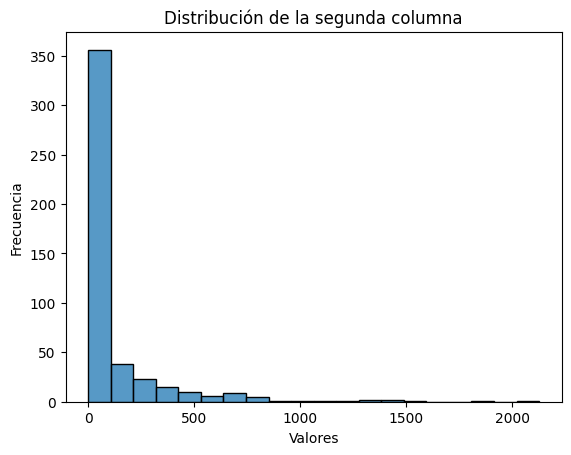

In [116]:
# Separa los datos de transacciones fraudulentas
condicion=df['Class']==1
df_1=df[condicion]
df_fraud=df_1['Amount']
df_fraud.head(10)
sns.histplot(data=df_fraud, bins=20)
plt.title('Distribución de la segunda columna')
plt.xlabel('Valores')
plt.ylabel('Frecuencia')

# plt.show()

<details>
  <summary><b>Haz clic aquí para obtener una pista</b></summary>
    
    Para visualizar la distribución de los importes de las transacciones fraudulentas, deberás filtrar el dataset para que contenga únicamente las transacciones fraudulentas (aquellas donde «Class» es igual a 1) y, después, usar un histograma para representar la distribución de los valores de la columna «Amount» de los datos filtrados.
</details>

## Desarrollo y evaluación de modelos

### Separa del dataset

In [117]:
# Imports métricas
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix, mean_absolute_error,mean_squared_error
#Imports modelos de predicción
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [118]:
X=df.drop('Class',axis=1)# Varaibles independientes
Y=df['Class'] # Variables dependiente

In [119]:
#División de los datos (variables independietes y dependiente) en 70% para entrenar al modelo y 30% para testear el modelo generado
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=42)

In [120]:
X_train.head(2)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
9303,13475.0,1.062798,-0.007554,1.169893,1.694109,-0.55909,0.527767,-0.608457,0.254902,1.958445,...,-0.269189,-0.175983,0.050427,-0.040761,0.185224,0.516446,-0.325208,0.039374,0.007193,9.00
76408,56552.0,0.847556,-0.338382,-0.191249,0.644180,-0.18354,-0.714065,0.632148,-0.252654,-0.251573,...,0.294179,-0.230173,-1.113621,-0.005678,0.078580,0.146345,0.145774,-0.084227,0.041947,209.85


In [121]:
Y_train.head(2)

9303     0
76408    0
Name: Class, dtype: int64

In [122]:
X_test.head(2)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
104697,69195.0,1.054379,-0.764756,0.160168,0.665587,1.113466,4.771656,-1.536609,1.306483,1.565054,...,0.050995,-0.097138,-0.029759,-0.171596,1.047201,0.698595,-0.217939,0.101970,0.040152,56.42
134356,80769.0,-4.805134,4.351191,-0.916135,-0.900752,-0.870777,-0.782946,0.328104,0.582501,2.749336,...,2.160193,-0.854486,-0.758266,0.147005,-0.021274,0.552660,0.008318,0.431835,-0.436239,9.82


In [123]:
Y_test.head(2)

104697    0
134356    0
Name: Class, dtype: int64

<h1><b>Linear Regression Model</b></h1>

In [124]:
lr_model=LinearRegression()
lr_model.fit(X_train,Y_train)
predicts_lr_model=lr_model.predict(X_test)
predicts_lr_model

array([-1.44463103e-04, -2.56058389e-03, -7.05544405e-04, ...,
       -4.13151655e-05,  5.55834749e-03, -1.63316435e-03])

In [125]:
# MAE (Mean Absoture Error): A menor valor mejor ajuste
mean_absolute_error(Y_test,predicts_lr_model)

0.003414450465640593

In [ ]:
# MSE (Mean Squared Error):
mean_squared_error(Y_test,predicts_lr_model)

0.0007349633227495807

In [ ]:
# RMSE (Root Mean Squared Error ):
np.sqrt(mean_squared_error(Y_test,predicts_lr_model))

0.027110206984631836

In [131]:
#Score. Devuelve la precisión media en los datos de prueba y las etiquetas dadas.
lr_model.score(X_test, Y_test)

0.484410487444938

<h1><b>Logistic Regression Model</b></h1>

In [ ]:
# Generamos el modelo
log_r_model=LogisticRegression()
log_r_model.fit(X_train,Y_train)
predicts_log_r_model=log_r_model.predict(X_test)


In [ ]:
print(classification_report(Y_test,predicts_log_r_model))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.65      0.66      0.66       136

    accuracy                           1.00     85443
   macro avg       0.83      0.83      0.83     85443
weighted avg       1.00      1.00      1.00     85443



In [ ]:
#Matrix Confusión
print(confusion_matrix(Y_test,predicts_log_r_model))

[[85259    48]
 [   46    90]]


<h1><b>K Neighbors Classifier</b></h1>

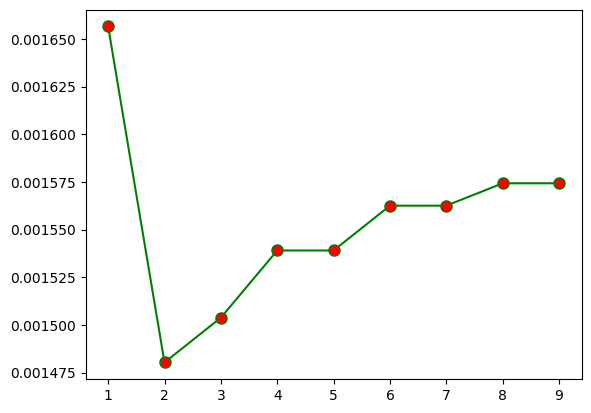

In [ ]:
#Generamos 10 modelos knn modificando el número de clases a crear para encontrar el tamaño óptimo (k)
tasa_error=[]
for i in range(1,10):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,Y_train)
    predict_i=knn.predict(X_test)
    tasa_error.append(np.mean(predict_i!=Y_test))

valores=range(1,10)
plt.plot(valores,tasa_error,color='g',marker='o',markerfacecolor='r',markersize=8)

In [ ]:
#Generamos modelo con k óptimo de tamaño 2
k_optimo=2
knn_model=KNeighborsClassifier(n_neighbors=k_optimo)
knn_model.fit(X_train,Y_train)
predicts_knn_model=knn_model.predict(X_test)


In [ ]:
print(classification_report(Y_test,predicts_knn_model))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       1.00      0.12      0.21       136

    accuracy                           1.00     85443
   macro avg       1.00      0.56      0.60     85443
weighted avg       1.00      1.00      1.00     85443



In [ ]:
#Matrix Confusión
print(confusion_matrix(Y_test,predicts_knn_model))

[[85307     0]
 [  120    16]]


<h1><b>DecisionTreeClassifier</b></h1>

In [134]:
dtree_model=DecisionTreeClassifier()
dtree_model.fit(X_train,Y_train)
predicts_dtree_model=dtree_model.predict(X_test)


In [ ]:
print(classification_report(Y_test,predicts_dtree_model))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.71      0.74      0.72       136

    accuracy                           1.00     85443
   macro avg       0.85      0.87      0.86     85443
weighted avg       1.00      1.00      1.00     85443



In [135]:
print(confusion_matrix(Y_test,predicts_dtree_model))

[[84944    40]
 [   31   103]]


<h1><b>RandomForestClassifier</b></h1>

In [ ]:
rfc_model=RandomForestClassifier(max_depth=150 ,random_state=42)
rfc_model.fit(X_train,Y_train)
predicts_rfc_model=dtree_model.predict(X_test)

In [ ]:
print(classification_report(Y_test,predicts_rfc_model))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84984
           1       0.70      0.79      0.74       134

    accuracy                           1.00     85118
   macro avg       0.85      0.90      0.87     85118
weighted avg       1.00      1.00      1.00     85118



In [ ]:
print(confusion_matrix(Y_test,predicts_rfc_model))

[[85265    42]
 [   35   101]]


<h1><b>SVC</b></h1>

In [ ]:
svc_model=SVC(gamma='auto')
svc_model.fit(X_train,Y_train)
predicts_svc_model=svc_model.predict(X_test)

In [ ]:
print(classification_report(Y_test,predicts_svc_model))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       1.00      0.07      0.14       136

    accuracy                           1.00     85443
   macro avg       1.00      0.54      0.57     85443
weighted avg       1.00      1.00      1.00     85443



In [ ]:
print(confusion_matrix(Y_test,predicts_svc_model))

[[85307     0]
 [  126    10]]


<details><summary><b>Haz clic aquí para obtener una pista</b></summary>



```
Una vez que tegas este dataset, puedes utilizar la biblioteca scikit-learn para separar los datos en grupos de entrenamiento y de evaluación con la función train_test_split().

Primero, puedes crear un dataframe de pandas «X» con todas las columnas excepto la columna «Class». Puedes crear una serie de pandas «y» solamente con la clumna «Class» column.

A continuación, pueder usar la función train_test_split() para separar los datos en grupos de entrenamiento y de evaluación. Puedes pasar las variables X e Y como argumentos junto con el argumento test_size para especificar el porcentaje del dataset que se deberá asignar al grupo de evaluación (en este caso, el 20 %). También puedes utilizar el argumento random_state para determinar un valor fijo de tal manera que, cada vez que se ejecute el código, se produzca la misma división.

La función train_test_split() devuelve cuatro variables: X_train, X_test, y_train y y_test. X_train e y_train representan el grupo de entrenamiento, minetras que X_test e y_test representan el grupo de evaluación. Puedes utilizar estas variable para entrenar y evaluar tus modelos de aprendizaje automático.

Ten en cuenta que es importante dividir los datos en grupos de entrenamiento y de evaluación para evitar el sobreajuste y permitir que se evalúe el rendimiento del modelo con datos que desconoce.

```



</details>

### Crea y evalúa los modelos

**Valoración de los modelos**

Linear Regression Model
		- MAE (Mean Absoture Error): 0.003427283567245722
		- MSE (Mean Squared Error): 0.0007349633227495807
		- MSE (Mean Squared Error): 0.027110206984631836
	  - Score (Precisión Media): 0.484410487444938

Logistic Regression Model
  Confusion Matrix: [[85259    48] [   46    90]]

K Neighbors Classifier
  Confusion Matrix: [[85307     0] [  120    16]]

DecisionTreeClassifier
  Confusion Matrix: [[85944    40] [   31   102]]

RandomForestClassifier
  Confusion Matrix: [[85265    42][   35   101]]

SVC
  Confusion Matrix: [[85265    42][   35   101]]
  [[85307     0][  126    10]]


(*) Confusion Matrix  [[TP FP][FN FP]]
    precisión =(TP+TN) / Total
    Error = (FP + FN) Total



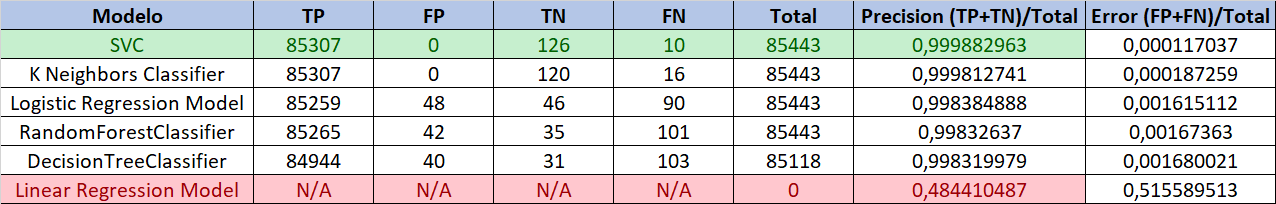

<details><summary><b>Haz clic aquí para obtener una pista</b></summary>



```
Debes haber importado las bibliotecas y clases necesarias, tales como la clase RandomForestClassifier de scikit-learn y las funciones classification_report() y accuracy_score() functions del módulo sklearn.metrics.

Una vez hayas hecho esto, podrás crear una instancia de la clase RandomForestClassifier configurando los hiperparámetros max_depth y random_state en 150 y 42, respectivamente. Puedes utilizar el método .fit() para entrenar el modelo con los datos de entrenamiento.

A continuación, puedes utilizar el modelo entrenado para hacer predicciones sobre los datos de evaluación con el método .predict(). Puedes almacenar estas predicciones en una variable llamada y_pred.

Después, puedes utilizar la función classification_report() para mostrar en la pantalla un resumen del rendimiento del modelo con los datos de entrenamiento. Esto incluirá métricos tales como la precisión (precission), la exhaustividad (recall) y la puntuación F1 (f1-score) para cada una de las clases (en este caso, si una transacción es fraudulenta o normal). También puedes utilizar la función accuracy_score() para calcular la exactitud general del modelo con los datos de evaluación.

Finalmente, podrás mostrar la exactitud el modelo en forma de porcentaje; utiliza el operador *100 para multiplicar la puntuación de exactitud por 100.

```



</details>